<a href="https://colab.research.google.com/github/ktgiahieu/BinPickingSimulation/blob/master/%5Baverage_scores%5D_ICLR_predicted_probability_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# !cp /content/gdrive/My\ Drive/Dataset/kaggle.json .
# !mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Mounted at /content/gdrive


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import json
import glob
import numpy as np
import re
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
import pandas as pd

# NO AVERAGE SCORES PAPER, EACH REVIEW ASSOCIATE WITH 1 TRAINING SAMPLE

# ICLR 2022

In [ ]:
correctnesses = []
technical_novelty_and_significances = []
empirical_novelty_and_significances = []
recommendations = []
confidences = []
accept_binaries = []
for file_name in glob.glob("/content/gdrive/MyDrive/UPSaclay/LLMs/openreview/ICLR2022/reviews/*.json"):
    with open(file_name, 'r') as f:
        parsed_reviews = json.load(f)


    inv_count = -1
    while 'decision' not in parsed_reviews[inv_count]['content']:
        inv_count -=1
    accept_binary = 'accept' in parsed_reviews[inv_count]['content']['decision'].lower()
    if not accept_binary and 'reject' not in parsed_reviews[inv_count]['content']['decision'].lower():
        print(parsed_reviews[inv_count]['content']['decision'].lower())


    for review in parsed_reviews:
        try:
            correctness = int(re.match(r"\d+", review['content']['correctness']).group(0))
            technical_novelty_and_significance = int(re.match(r"\d+", review['content']['technical_novelty_and_significance']).group(0))
            empirical_novelty_and_significance = int(re.match(r"\d+", review['content']['empirical_novelty_and_significance']).group(0))
            recommendation = int(re.match(r"\d+", review['content']['recommendation']).group(0))
            confidence = int(re.match(r"\d+", review['content']['confidence']).group(0))
            correctnesses.append(correctness)
            technical_novelty_and_significances.append(technical_novelty_and_significance)
            empirical_novelty_and_significances.append(empirical_novelty_and_significance)
            recommendations.append(recommendation)
            confidences.append(confidence)
            accept_binaries.append(accept_binary)
        except:
            continue
        


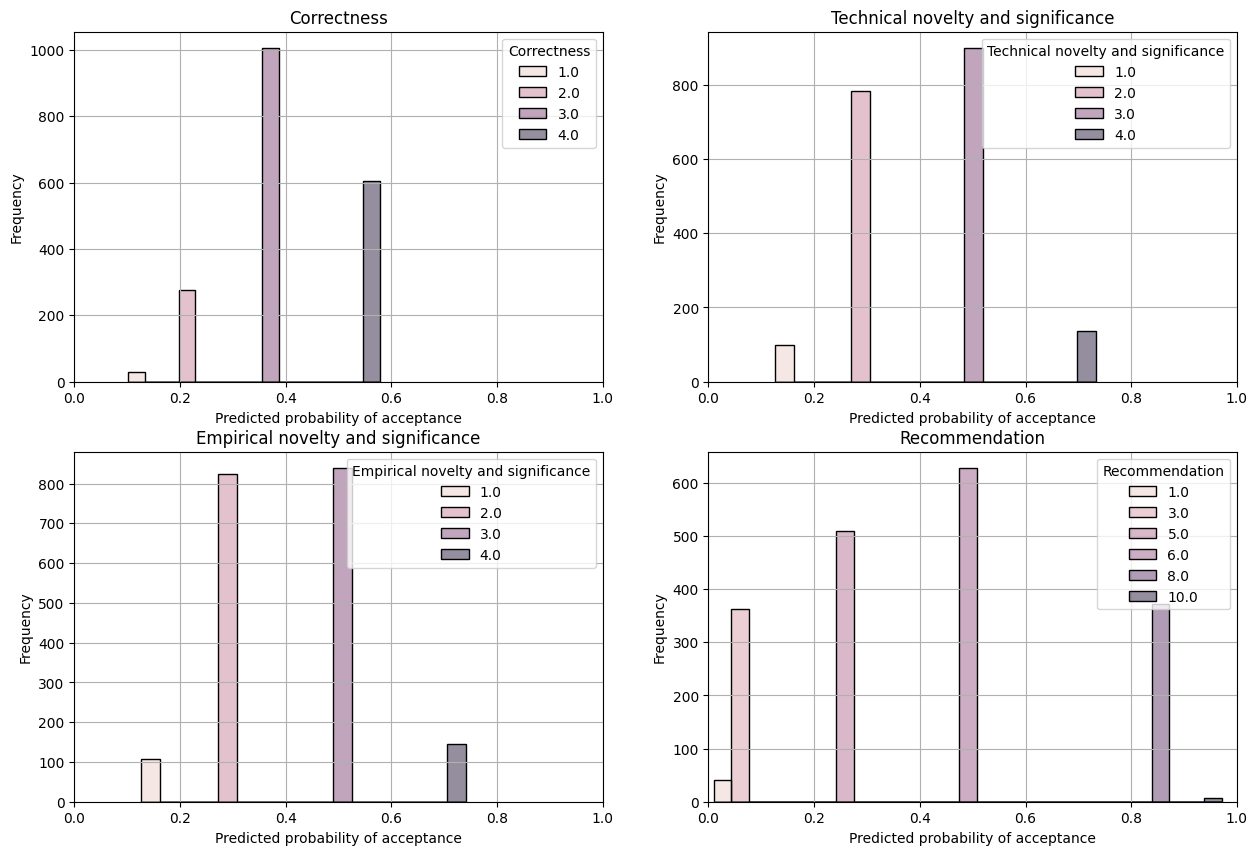

In [ ]:
# Build the logistic regression model to predict the acceptance probability from the reviews score independently

# Plot the histogram of the predicted probabilities
def plot_predicted_proba_hist(X, y, title, ax):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf = LogisticRegression(random_state=0).fit(X_train, y_train)
    y_pred = clf.predict_proba(X_test)[:, 1]
    
    # plot the histogram of the predicted probabilities, with hue is the score in the review
    Xy_test = np.concatenate([X_test, np.array(y_pred).reshape(-1,1)], axis=1)
    Xy_test = pd.DataFrame(Xy_test, columns=[title, 'prediction'])
    sns.histplot(data=Xy_test, x='prediction', hue=title, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted probability of acceptance')
    ax.set_ylabel('Frequency')
    ax.set_xlim(0, 1)
    ax.grid(True)


fig, ax = plt.subplots(2, 2, figsize=(15, 10))
plot_predicted_proba_hist(np.array(correctnesses).reshape(-1, 1), accept_binaries, 'Correctness', ax[0, 0])
plot_predicted_proba_hist(np.array(technical_novelty_and_significances).reshape(-1, 1), accept_binaries, 'Technical novelty and significance', ax[0, 1])
plot_predicted_proba_hist(np.array(empirical_novelty_and_significances).reshape(-1, 1), accept_binaries, 'Empirical novelty and significance', ax[1, 0])
plot_predicted_proba_hist(np.array(recommendations).reshape(-1, 1), accept_binaries, 'Recommendation', ax[1, 1])

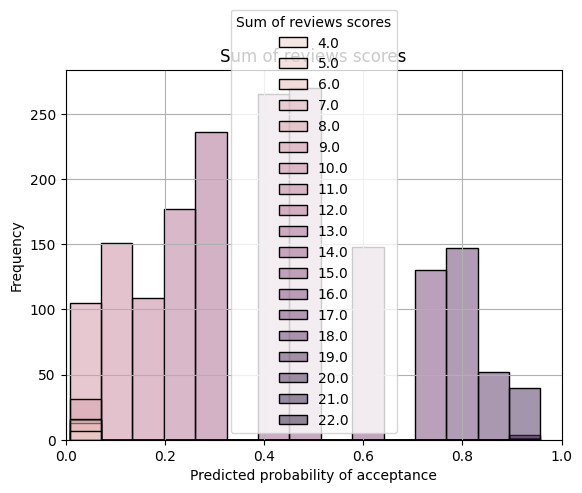

In [ ]:
# Plot the histogram of the predicted probabilities using all the reviews scores for the logistic regression
fig, ax = plt.subplots(1, 1)
plot_predicted_proba_hist(np.sum([correctnesses, technical_novelty_and_significances, empirical_novelty_and_significances, recommendations], axis=0).reshape(-1,1), accept_binaries, 'Sum of reviews scores', ax)


# ICLR 2023

In [ ]:
correctnesses = []
technical_novelty_and_significances = []
empirical_novelty_and_significances = []
recommendations = []
confidences = []
accept_binaries = []
for file_name in glob.glob("/content/gdrive/MyDrive/UPSaclay/LLMs/openreview/ICLR2023/reviews/*.json"):
    with open(file_name, 'r') as f:
        parsed_reviews = json.load(f)


    inv_count = -1
    while 'decision' not in parsed_reviews[inv_count]['content']:
        inv_count -=1
    accept_binary = 'accept' in parsed_reviews[inv_count]['content']['decision'].lower()
    if not accept_binary and 'reject' not in parsed_reviews[inv_count]['content']['decision'].lower():
        print(parsed_reviews[inv_count]['content']['decision'].lower())


    for review in parsed_reviews:
        try:
            correctness = int(re.match(r"\d+", review['content']['correctness']).group(0))
            technical_novelty_and_significance = int(re.match(r"\d+", review['content']['technical_novelty_and_significance']).group(0))
            empirical_novelty_and_significance = int(re.match(r"\d+", review['content']['empirical_novelty_and_significance']).group(0))
            recommendation = int(re.match(r"\d+", review['content']['recommendation']).group(0))
            confidence = int(re.match(r"\d+", review['content']['confidence']).group(0))
            correctnesses.append(correctness)
            technical_novelty_and_significances.append(technical_novelty_and_significance)
            empirical_novelty_and_significances.append(empirical_novelty_and_significance)
            recommendations.append(recommendation)
            confidences.append(confidence)
            accept_binaries.append(accept_binary)
        except:
            continue
        


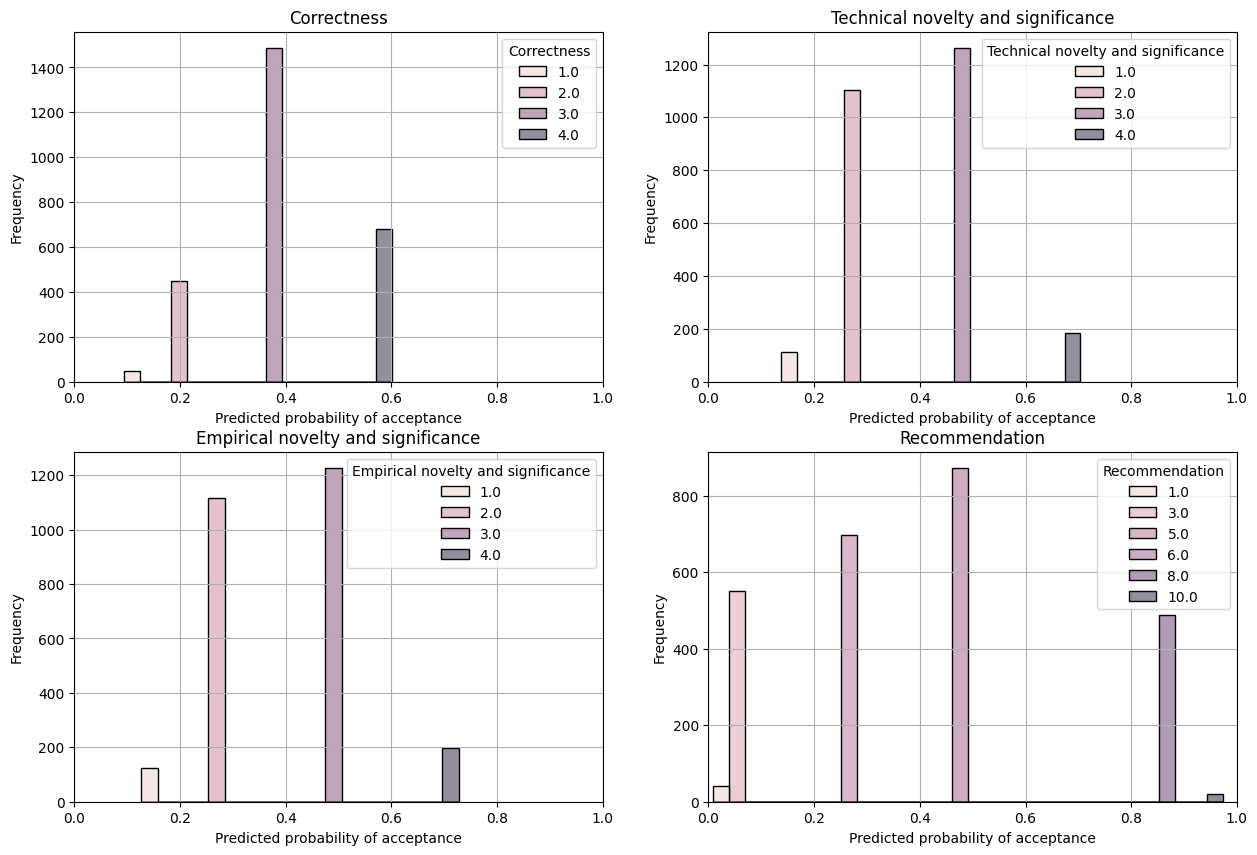

In [ ]:
# Build the logistic regression model to predict the acceptance probability from the reviews score independently

# Plot the histogram of the predicted probabilities
def plot_predicted_proba_hist(X, y, title, ax):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf = LogisticRegression(random_state=0).fit(X_train, y_train)
    y_pred = clf.predict_proba(X_test)[:, 1]
    
    # plot the histogram of the predicted probabilities, with hue is the score in the review
    Xy_test = np.concatenate([X_test, np.array(y_pred).reshape(-1,1)], axis=1)
    Xy_test = pd.DataFrame(Xy_test, columns=[title, 'prediction'])
    sns.histplot(data=Xy_test, x='prediction', hue=title, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted probability of acceptance')
    ax.set_ylabel('Frequency')
    ax.set_xlim(0, 1)
    ax.grid(True)


fig, ax = plt.subplots(2, 2, figsize=(15, 10))
plot_predicted_proba_hist(np.array(correctnesses).reshape(-1, 1), accept_binaries, 'Correctness', ax[0, 0])
plot_predicted_proba_hist(np.array(technical_novelty_and_significances).reshape(-1, 1), accept_binaries, 'Technical novelty and significance', ax[0, 1])
plot_predicted_proba_hist(np.array(empirical_novelty_and_significances).reshape(-1, 1), accept_binaries, 'Empirical novelty and significance', ax[1, 0])
plot_predicted_proba_hist(np.array(recommendations).reshape(-1, 1), accept_binaries, 'Recommendation', ax[1, 1])

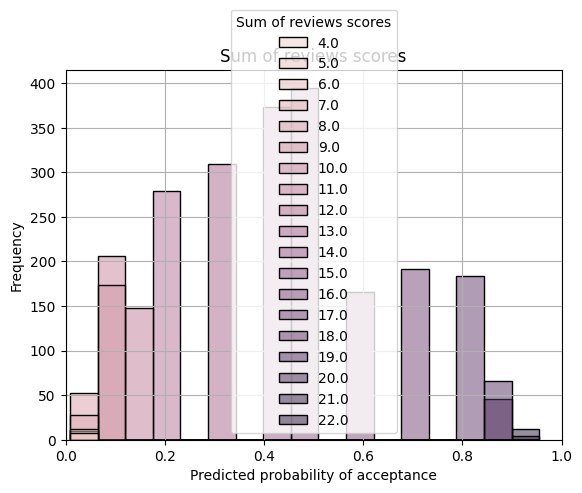

In [ ]:
# Plot the histogram of the predicted probabilities using all the reviews scores for the logistic regression
fig, ax = plt.subplots(1, 1)
plot_predicted_proba_hist(np.sum([correctnesses, technical_novelty_and_significances, empirical_novelty_and_significances, recommendations], axis=0).reshape(-1,1), accept_binaries, 'Sum of reviews scores', ax)
